<a href="https://colab.research.google.com/github/mimahb/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset preview
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
checking for missing values
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


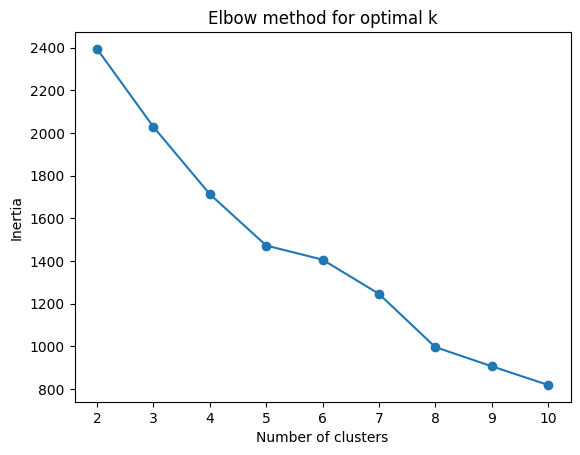

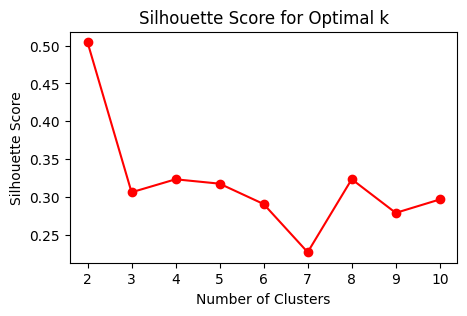

Silhouette Score: 0.32


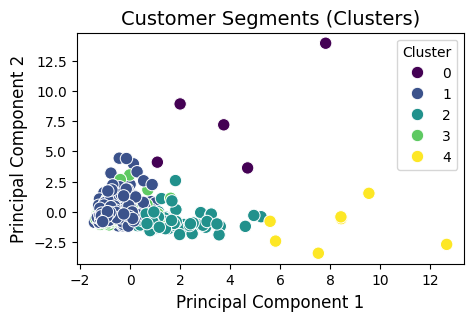


Cluster Centers:
     Region         Fresh          Milk       Grocery        Frozen  \
0  2.800000  50270.600000  26361.800000  16416.000000  25122.800000   
1  3.000000  13215.967742   3569.310484   4380.012097   3075.552419   
2  2.666667   5326.205128  11574.846154  18409.474359   1550.846154   
3  1.323529  11721.127451   3567.970588   4915.852941   3180.205882   
4  2.571429  20031.285714  38084.000000  56126.142857   2564.571429   

   Detergents_Paper    Delicassen  
0       2475.000000  18595.200000  
1       1126.362903   1210.193548  
2       8343.102564   1743.769231  
3       1292.843137   1215.568627  
4      27644.571429   2548.142857  


In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv("/content/Wholesale customers data.csv")

print('dataset preview')
print(df.head())

print('checking for missing values')
print(df.isnull().sum())

scaler = StandardScaler()
df_processed = df.drop('Channel', axis=1)
df_scaled = scaler.fit_transform(df_processed)

inertias = []
silhouette_scores = []
for k  in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(5, 3))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")


# Visualizing clusters

# PCA for visualization (reducing to 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Scatter plot of clusters
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=80, edgecolor='white')

plt.title('Customer Segments (Clusters)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

centers = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers)
cluster_centers_df = pd.DataFrame(centers_original, columns=df_processed.columns)
print("\nCluster Centers:")
print(cluster_centers_df)

filename = 'model.pkl'
pickle.dump(kmeans, open(filename,'wb'))

